In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_xrd(cif=1000000):
    return pd.read_csv(cif + '.xy', sep='\t', header=None)

In [3]:
np.random.seed(10)

In [4]:
df = pd.read_pickle('../qmof_df.pkl')

## Picking common MOFs in all directories

In [5]:
macro = open('./mofs_macro/control_xy.txt','r')
macro = [i.split('.')[0] for i in macro.readlines()]
#'''
s0050 = open('./mofs_0050nm/control_xy.txt','r')
s0050 = ['_'.join(i.split('_')[:2]) for i in s0050.readlines()]
#'''
s0075 = open('./mofs_0075nm/control_xy.txt','r')
s0075 = ['_'.join(i.split('_')[:2]) for i in s0075.readlines()]

s0100 = open('./mofs_0100nm/control_xy.txt','r')
s0100 = ['_'.join(i.split('_')[:2]) for i in s0100.readlines()]

s0250 = open('./mofs_0250nm/control_xy.txt','r')
s0250 = ['_'.join(i.split('_')[:2]) for i in s0250.readlines()]

In [6]:
common1 = np.intersect1d(macro,s0075)
common2 = np.intersect1d(s0100,s0250)
common3 = np.intersect1d(common1,s0050)

common = np.intersect1d(common3, common2)

The variable 'common' enlist the common MOFs in all directories.

In [7]:
common.shape

(16029,)

Now, we take the common MOFs from the dataframe

In [8]:
df = df.loc[df['name'].isin([i for i in common])]

In [9]:
df = df[['name', 'info.formula','outputs.pbe.bandgap']]

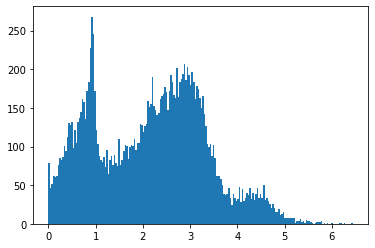

In [10]:
plt.figure()
plt.hist(df['outputs.pbe.bandgap'].values, bins=200)
#plt.hlines(y=55, xmin=0, xmax=5, color='black')
plt.show()

We will compute the input data, the output data and the csv-file in batches of 300 samples.

In [11]:
df.shape[0]

16029

In [12]:
steps = np.arange(0, 16200, 300)

In [13]:
steps

array([    0,   300,   600,   900,  1200,  1500,  1800,  2100,  2400,
        2700,  3000,  3300,  3600,  3900,  4200,  4500,  4800,  5100,
        5400,  5700,  6000,  6300,  6600,  6900,  7200,  7500,  7800,
        8100,  8400,  8700,  9000,  9300,  9600,  9900, 10200, 10500,
       10800, 11100, 11400, 11700, 12000, 12300, 12600, 12900, 13200,
       13500, 13800, 14100, 14400, 14700, 15000, 15300, 15600, 15900])

The next code can be modified to create the needed data according to the directory in use.

In [15]:
for item in steps:
    
    df_temp = df_temp = df.iloc[item:(item+300),:].reset_index(drop=True)
    
    for row in range(df_temp.shape[0]):

        xrd = load_xrd(cif='./mofs_0050nm/' + df_temp.iloc[row,0] + '_0050')
        input_noise = xrd[1].values/xrd[1].values.max()
        noise = 1e-3*np.random.uniform(size=input_data.shape)
        input_noise = input_data + noise
        q = np.sin(np.deg2rad(xrd[0].values/2))
        diff = np.concatenate((input_noise[:,np.newaxis], q[:,np.newaxis]), axis=1)

        if row == 0:
            diff_stacked = diff[np.newaxis,:,:]
        else:
            diff_stacked = np.concatenate((diff_stacked, diff[np.newaxis,:,:]), axis = 0)

    print('Finished for first', item + 300, 'compounds')
    
    np.save('./xset_' + str(item) + '_0050', diff_stacked)
    np.save('./yset_' + str(item) + '_0050', df_temp['outputs.pbe.bandgap'].values)
    df_temp.to_pickle('./dfset_'+str(item)+'_0050.pkl')

Finished for first 300 compounds
Finished for first 600 compounds
Finished for first 900 compounds
Finished for first 1200 compounds
Finished for first 1500 compounds
Finished for first 1800 compounds
Finished for first 2100 compounds
Finished for first 2400 compounds
Finished for first 2700 compounds
Finished for first 3000 compounds
Finished for first 3300 compounds
Finished for first 3600 compounds
Finished for first 3900 compounds
Finished for first 4200 compounds
Finished for first 4500 compounds
Finished for first 4800 compounds
Finished for first 5100 compounds
Finished for first 5400 compounds
Finished for first 5700 compounds
Finished for first 6000 compounds
Finished for first 6300 compounds
Finished for first 6600 compounds
Finished for first 6900 compounds
Finished for first 7200 compounds
Finished for first 7500 compounds
Finished for first 7800 compounds
Finished for first 8100 compounds
Finished for first 8400 compounds
Finished for first 8700 compounds
Finished for firs

In [16]:
for item in steps:
    
    df_temp = df_temp = df.iloc[item:(item+300),:].reset_index(drop=True)
    
    for row in range(df_temp.shape[0]):

        xrd = load_xrd(cif='./mofs_0075nm/' + df_temp.iloc[row,0] + '_0075')
        input_noise = xrd[1].values/xrd[1].values.max()
        noise = 1e-3*np.random.uniform(size=input_data.shape)
        input_noise = input_data + noise
        q = np.sin(np.deg2rad(xrd[0].values/2))
        diff = np.concatenate((input_noise[:,np.newaxis], q[:,np.newaxis]), axis=1)

        if row == 0:
            diff_stacked = diff[np.newaxis,:,:]
        else:
            diff_stacked = np.concatenate((diff_stacked, diff[np.newaxis,:,:]), axis = 0)

    print('Finished for first', item + 300, 'compounds')
    
    np.save('./xset_' + str(item) + '_0075', diff_stacked)
    np.save('./yset_' + str(item) + '_0075', df_temp['outputs.pbe.bandgap'].values)
    df_temp.to_pickle('./dfset_'+str(item)+'_0075.pkl')

Finished for first 300 compounds
Finished for first 600 compounds
Finished for first 900 compounds
Finished for first 1200 compounds
Finished for first 1500 compounds
Finished for first 1800 compounds
Finished for first 2100 compounds
Finished for first 2400 compounds
Finished for first 2700 compounds
Finished for first 3000 compounds
Finished for first 3300 compounds
Finished for first 3600 compounds
Finished for first 3900 compounds
Finished for first 4200 compounds
Finished for first 4500 compounds
Finished for first 4800 compounds
Finished for first 5100 compounds
Finished for first 5400 compounds
Finished for first 5700 compounds
Finished for first 6000 compounds
Finished for first 6300 compounds
Finished for first 6600 compounds
Finished for first 6900 compounds
Finished for first 7200 compounds
Finished for first 7500 compounds
Finished for first 7800 compounds
Finished for first 8100 compounds
Finished for first 8400 compounds
Finished for first 8700 compounds
Finished for firs

In [17]:
for item in steps:
    
    df_temp = df_temp = df.iloc[item:(item+300),:].reset_index(drop=True)
    
    for row in range(df_temp.shape[0]):

        xrd = load_xrd(cif='./mofs_0100nm/' + df_temp.iloc[row,0] + '_0100')
        input_noise = xrd[1].values/xrd[1].values.max()
        noise = 1e-3*np.random.uniform(size=input_data.shape)
        input_noise = input_data + noise
        q = np.sin(np.deg2rad(xrd[0].values/2))
        diff = np.concatenate((input_noise[:,np.newaxis], q[:,np.newaxis]), axis=1)

        if row == 0:
            diff_stacked = diff[np.newaxis,:,:]
        else:
            diff_stacked = np.concatenate((diff_stacked, diff[np.newaxis,:,:]), axis = 0)

    print('Finished for first', item + 300, 'compounds')
    
    np.save('./xset_' + str(item) + '_0100', diff_stacked)
    np.save('./yset_' + str(item) + '_0100', df_temp['outputs.pbe.bandgap'].values)
    df_temp.to_pickle('./dfset_'+str(item)+'_0100.pkl')

Finished for first 300 compounds
Finished for first 600 compounds
Finished for first 900 compounds
Finished for first 1200 compounds
Finished for first 1500 compounds
Finished for first 1800 compounds
Finished for first 2100 compounds
Finished for first 2400 compounds
Finished for first 2700 compounds
Finished for first 3000 compounds
Finished for first 3300 compounds
Finished for first 3600 compounds
Finished for first 3900 compounds
Finished for first 4200 compounds
Finished for first 4500 compounds
Finished for first 4800 compounds
Finished for first 5100 compounds
Finished for first 5400 compounds
Finished for first 5700 compounds
Finished for first 6000 compounds
Finished for first 6300 compounds
Finished for first 6600 compounds
Finished for first 6900 compounds
Finished for first 7200 compounds
Finished for first 7500 compounds
Finished for first 7800 compounds
Finished for first 8100 compounds
Finished for first 8400 compounds
Finished for first 8700 compounds
Finished for firs

In [18]:
for item in steps:
    
    df_temp = df_temp = df.iloc[item:(item+300),:].reset_index(drop=True)
    
    for row in range(df_temp.shape[0]):

        xrd = load_xrd(cif='./mofs_0250nm/' + df_temp.iloc[row,0] + '_0250')
        input_noise = xrd[1].values/xrd[1].values.max()
        q = np.sin(np.deg2rad(xrd[0].values/2))
        diff = np.concatenate((input_noise[:,np.newaxis], q[:,np.newaxis]), axis=1)

        if row == 0:
            diff_stacked = diff[np.newaxis,:,:]
        else:
            diff_stacked = np.concatenate((diff_stacked, diff[np.newaxis,:,:]), axis = 0)

    print('Finished for first', item + 300, 'compounds')

    np.save('./xset_' + str(item) + '_0250', diff_stacked)
    np.save('./yset_' + str(item) + '_0250', df_temp['outputs.pbe.bandgap'].values)
    df_temp.to_pickle('./dfset_'+str(item)+'_0250.pkl')

Finished for first 300 compounds
Finished for first 600 compounds
Finished for first 900 compounds
Finished for first 1200 compounds
Finished for first 1500 compounds
Finished for first 1800 compounds
Finished for first 2100 compounds
Finished for first 2400 compounds
Finished for first 2700 compounds
Finished for first 3000 compounds
Finished for first 3300 compounds
Finished for first 3600 compounds
Finished for first 3900 compounds
Finished for first 4200 compounds
Finished for first 4500 compounds
Finished for first 4800 compounds
Finished for first 5100 compounds
Finished for first 5400 compounds
Finished for first 5700 compounds
Finished for first 6000 compounds
Finished for first 6300 compounds
Finished for first 6600 compounds
Finished for first 6900 compounds
Finished for first 7200 compounds
Finished for first 7500 compounds
Finished for first 7800 compounds
Finished for first 8100 compounds
Finished for first 8400 compounds
Finished for first 8700 compounds
Finished for firs

In [19]:
for item in steps:
    
    df_temp = df_temp = df.iloc[item:(item+300),:].reset_index(drop=True)
    
    for row in range(df_temp.shape[0]):

        xrd = load_xrd(cif='./mofs_macro/' + df_temp.iloc[row,0])
        input_noise = xrd[1].values/xrd[1].values.max()
        q = np.sin(np.deg2rad(xrd[0].values/2))
        diff = np.concatenate((input_noise[:,np.newaxis], q[:,np.newaxis]), axis=1)

        if row == 0:
            diff_stacked = diff[np.newaxis,:,:]
        else:
            diff_stacked = np.concatenate((diff_stacked, diff[np.newaxis,:,:]), axis = 0)

    print('Finished for first', item + 300, 'compounds')

    np.save('./xset_' + str(item) + '_macro', diff_stacked)
    np.save('./yset_' + str(item) + '_macro', df_temp['outputs.pbe.bandgap'].values)
    df_temp.to_pickle('./dfset_'+str(item)+'_macro.pkl')

Finished for first 300 compounds
Finished for first 600 compounds
Finished for first 900 compounds
Finished for first 1200 compounds
Finished for first 1500 compounds
Finished for first 1800 compounds
Finished for first 2100 compounds
Finished for first 2400 compounds
Finished for first 2700 compounds
Finished for first 3000 compounds
Finished for first 3300 compounds
Finished for first 3600 compounds
Finished for first 3900 compounds
Finished for first 4200 compounds
Finished for first 4500 compounds
Finished for first 4800 compounds
Finished for first 5100 compounds
Finished for first 5400 compounds
Finished for first 5700 compounds
Finished for first 6000 compounds
Finished for first 6300 compounds
Finished for first 6600 compounds
Finished for first 6900 compounds
Finished for first 7200 compounds
Finished for first 7500 compounds
Finished for first 7800 compounds
Finished for first 8100 compounds
Finished for first 8400 compounds
Finished for first 8700 compounds
Finished for firs